# Let's import the dataset and see various features it contains.But before that we have to import some of the important libraries that will help us in data manipulation and visualization.

In [4]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)

In [5]:
# importing the dataset
df=pd.read_csv('deliveries.csv')
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
# lets check the shape
df.shape

(150460, 21)

### The data contains 1.5 lakh instances and 21 features

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

### Listing features containing missing values, some instances may not be necessary missing but may have not available values, like if batsman is not out that feature will have a nan value or something else that we will handle in feature engineering

In [8]:
feature_nan=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_nan

['player_dismissed', 'dismissal_kind', 'fielder']

### Checking spelling mstakes and giving short forms to the teams.

In [9]:
df.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

### Note :There are some spelling mistakes, some team names are repeating so it would be better if we covert team names to their respective short forms

In [10]:
# lets make a copy of our original DataFrame
df_1=df.copy()
# batting team name corrections
df_1.loc[(df_1['batting_team']=='Sunrisers Hyderabad'),['batting_team']]='SRH'
df_1.loc[(df_1['batting_team']=='Mumbai Indians'),['batting_team']]='MI'
df_1.loc[(df_1['batting_team']=='Gujarat Lions'),['batting_team']]='GL'
df_1.loc[(df_1['batting_team']=='Rising Pune Supergiant'),['batting_team']]='RPS'
df_1.loc[(df_1['batting_team']=='Rising Pune Supergiants'),['batting_team']]='RPS'
df_1.loc[(df_1['batting_team']=='Royal Challengers Bangalore'),['batting_team']]='RCB'
df_1.loc[(df_1['batting_team']=='Kolkata Knight Riders'),['batting_team']]='KKR'
df_1.loc[(df_1['batting_team']=='Delhi Daredevils'),['batting_team']]='DD'
df_1.loc[(df_1['batting_team']=='Kings XI Punjab'),['batting_team']]='KXIP'
df_1.loc[(df_1['batting_team']=='Chennai Super Kings'),['batting_team']]='CSK'
df_1.loc[(df_1['batting_team']=='Rajasthan Royals'),['batting_team']]='RR'
df_1.loc[(df_1['batting_team']=='Deccan Chargers'),['batting_team']]='DCR'
df_1.loc[(df_1['batting_team']=='Kochi Tuskers Kerala'),['batting_team']]='KTK'
df_1.loc[(df_1['batting_team']=='Pune Warriors'),['batting_team']]='PW'
df_1.loc[(df_1['batting_team']=='Delhi Capitals'),['batting_team']]='DC'

In [11]:
# bowling team name corrections
df_1.loc[(df_1['bowling_team']=='Sunrisers Hyderabad'),['bowling_team']]='SRH'
df_1.loc[(df_1['bowling_team']=='Mumbai Indians'),['bowling_team']]='MI'
df_1.loc[(df_1['bowling_team']=='Gujarat Lions'),['bowling_team']]='GL'
df_1.loc[(df_1['bowling_team']=='Rising Pune Supergiant'),['bowling_team']]='RPS'
df_1.loc[(df_1['bowling_team']=='Rising Pune Supergiants'),['bowling_team']]='RPS'
df_1.loc[(df_1['bowling_team']=='Royal Challengers Bangalore'),['bowling_team']]='RCB'
df_1.loc[(df_1['bowling_team']=='Kolkata Knight Riders'),['bowling_team']]='KKR'
df_1.loc[(df_1['bowling_team']=='Delhi Daredevils'),['bowling_team']]='DD'
df_1.loc[(df_1['bowling_team']=='Kings XI Punjab'),['bowling_team']]='KXIP'
df_1.loc[(df_1['bowling_team']=='Chennai Super Kings'),['bowling_team']]='CSK'
df_1.loc[(df_1['bowling_team']=='Rajasthan Royals'),['bowling_team']]='RR'
df_1.loc[(df_1['bowling_team']=='Deccan Chargers'),['bowling_team']]='DCR'
df_1.loc[(df_1['bowling_team']=='Kochi Tuskers Kerala'),['bowling_team']]='KTK'
df_1.loc[(df_1['bowling_team']=='Pune Warriors'),['bowling_team']]='PW'
df_1.loc[(df_1['bowling_team']=='Delhi Capitals'),['bowling_team']]='DC'

In [12]:
# lets see the modified dataframe
df_1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


# Batsman Analysis:-

## 1. Hieghest run scorer's:-

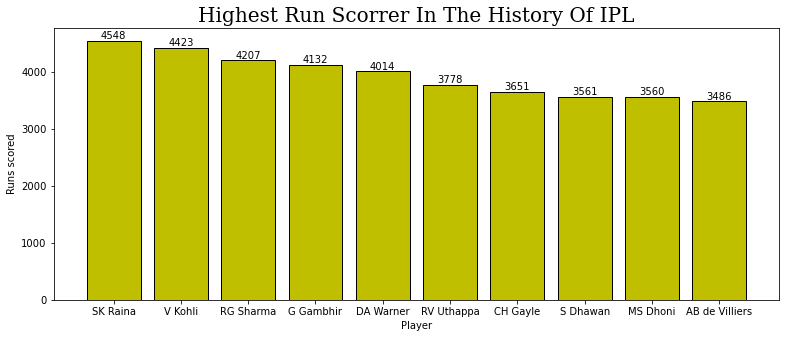

In [13]:
# first we store the names of players and runs scorred by them in two different variables
x=df_1.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)[:10].index
y=df_1.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)[:10].values
# ploting the bar plot
plt.figure(figsize=(13,5))
plt.bar(x,y,fc='y',ec='k')
plt.title('Highest Run Scorrer In The History Of IPL',fontdict={'family':'serif','color':'k','size':20})
plt.xlabel('Player')
plt.ylabel('Runs scored')
# we write a for loop to add the scores on top of the bars
for i in range(len(y)):
    plt.text(i,y[i],str(y[i]),ha='center',va='bottom')    

### Observations:
1. SK Raina is leading with 4548 total ipl runs, followed by V kohli and Rohit Sharma.

## 2. Top 3 run scorer's for their teams:-

In [14]:
# first we will sum up the scores for each batsman
top=df_1.groupby(['batting_team','batsman'])['batsman_runs'].sum().reset_index()
# now we sort these scores in descending order
top=top.groupby(['batting_team']).apply(lambda x:x.sort_values(by='batsman_runs',ascending=False)).reset_index(drop=True)
# now we are taking out only the top three scores by using groupby and head and make a new DataFrame
top_3=top.groupby('batting_team').head(3).reset_index(drop=True)
top_3

,batting_team,batsman,batsman_runs
0,CSK,SK Raina,3707
1,CSK,MS Dhoni,2986
2,CSK,MEK Hussey,1768
3,DCR,AC Gilchrist,1220
4,DCR,RG Sharma,1170
5,DCR,S Dhawan,969
6,DD,V Sehwag,2174
7,DD,DA Warner,1435
8,DD,G Gambhir,1097
9,GL,SK Raina,841


### Lets write a function to see top 3 run getters for every team:

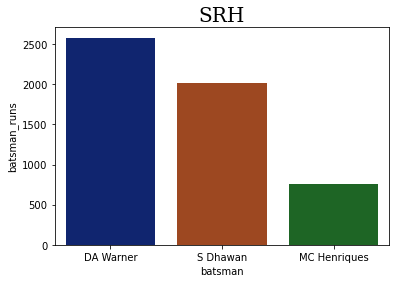

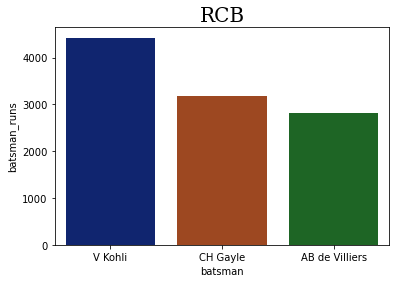

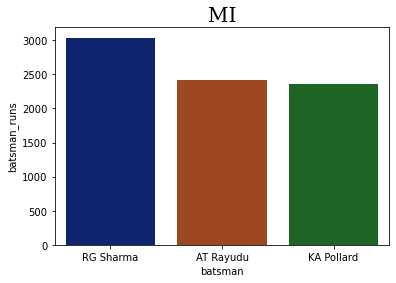

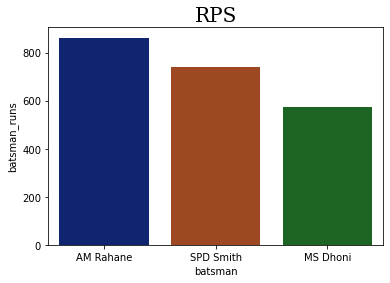

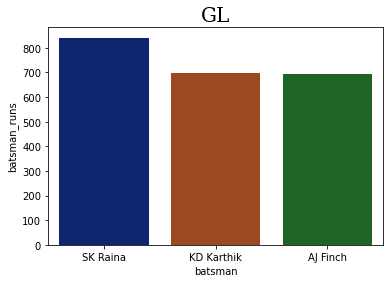

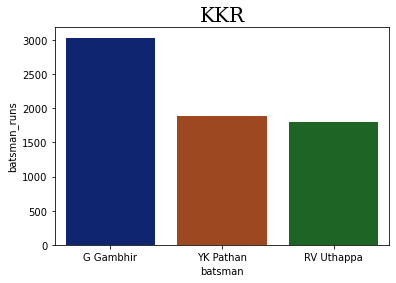

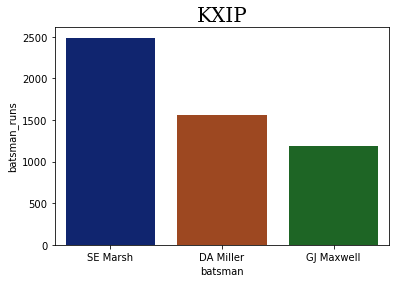

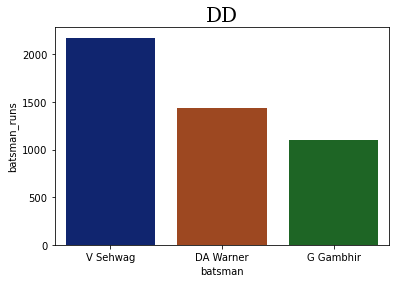

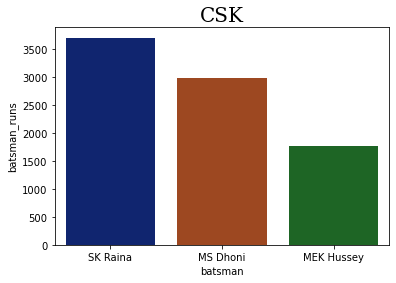

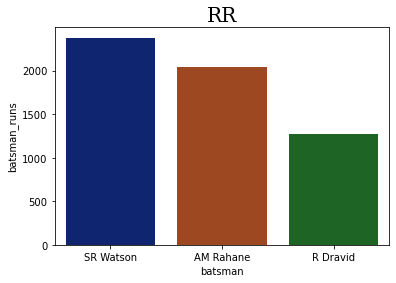

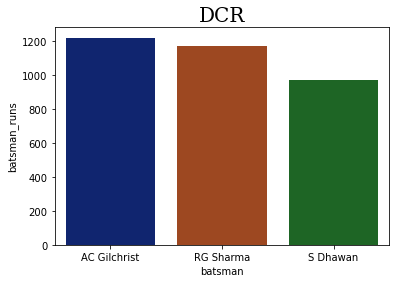

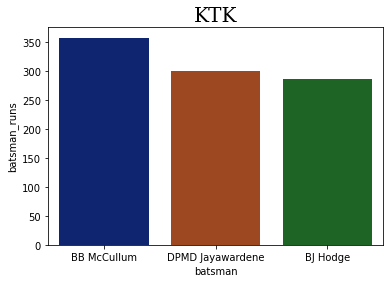

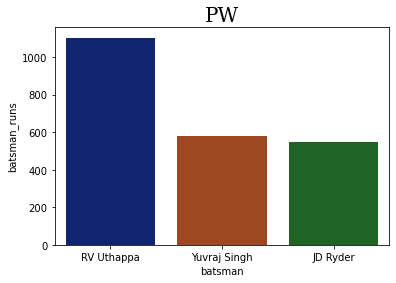

In [15]:
# lets define a function 
def top(a):
    sns.barplot(x='batsman',y='batsman_runs',data=top_3[(top_3['batting_team']==a)],palette='dark')
#  using the for loop we can see the visualization:
for team in df_1.batting_team.unique():
    fig,ax=plt.subplots()
    plt.title(team,fontdict={'family':'serif','color':'k','size':20})
    top(team)
# See the result below

## 3. Best Finishers

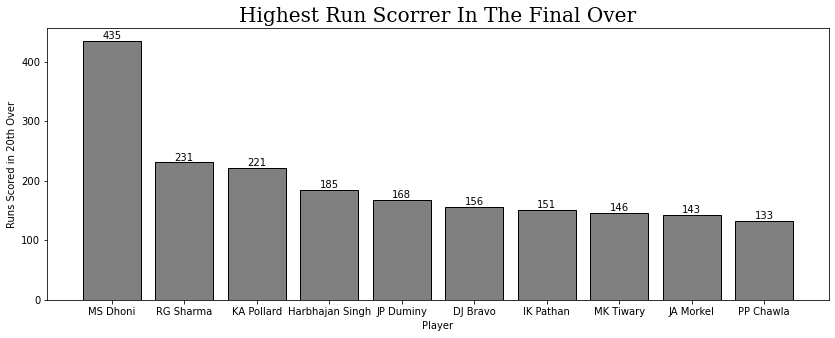

In [16]:
# storing the names and scores in respective x and y variables

x=df_1.loc[df_1['over']==20].groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)[:10].index
y=df_1.loc[df_1['over']==20].groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)[:10].values

# plotting the figure

plt.figure(figsize=(14,5))
plt.bar(x,y,fc='grey',ec='k')
plt.title('Highest Run Scorrer In The Final Over',fontdict={'family':'serif','color':'k','size':20})
plt.xlabel('Player')
plt.ylabel('Runs Scored in 20th Over')

# we write a for loop to add the scores on top of the bars
for i in range(len(y)):
    plt.text(i,y[i],str(y[i]),ha='center',va='bottom')    

### Observations:
1. No wonder why MS Dhoni is the greatest finisher in the world. He has scored the maximum runs and almost double that of the second highest

## 4. Power Players : Top run getters in first 6 overs

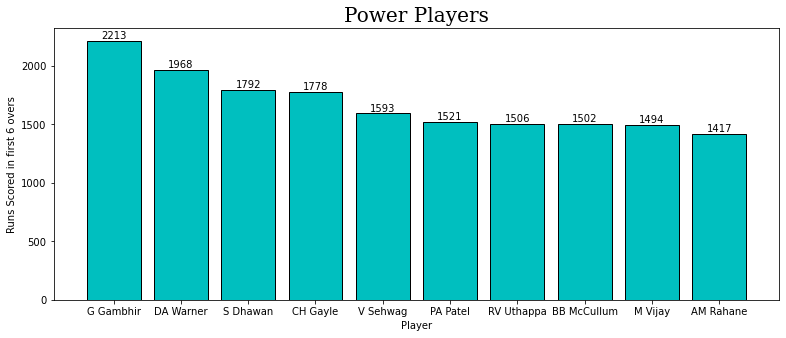

In [17]:
x=df_1.loc[df_1['over']<=6].groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)[:10].index
y=df_1.loc[df_1['over']<=6].groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)[:10].values

plt.figure(figsize=(13,5))
plt.bar(x,y,fc='c',ec='k')
plt.title('Power Players',fontdict={'family':'serif','color':'k','size':20})
plt.xlabel('Player')
plt.ylabel('Runs Scored in first 6 overs')

# we write a for loop to add the scores on top of the bars
for i in range(len(y)):
    plt.text(i,y[i],str(y[i]),ha='center',va='bottom')    

### Observations:
1. first 6 overs are powerplay overs.
2. we can see that all the player are openers.
3. Gambhir leads with more than 2000 runs.

## 5. Runs against team : Favourite team
Here we will see who are those batsman that makes most against a particular team.

In [18]:
# first we will sum up the scores for each batsman
top_agnst=df_1.groupby(['bowling_team','batsman'])['batsman_runs'].sum().reset_index()
# now we sort these scores in descending order
top_agnst=top_agnst.groupby(['bowling_team']).apply(lambda x:x.sort_values(by='batsman_runs',ascending=False)).reset_index(drop=True)
# now we are taking out only the top three scores by using groupby and head and make a new DataFrame
top_agnst1=top_agnst.groupby('bowling_team').head(3).reset_index(drop=True)
# lets see the final result
top_agnst1

,bowling_team,batsman,batsman_runs
0,CSK,V Kohli,706
1,CSK,RG Sharma,535
2,CSK,RV Uthappa,492
3,DCR,R Dravid,339
4,DCR,SC Ganguly,327
5,DCR,V Sehwag,317
6,DD,RG Sharma,670
7,DD,V Kohli,661
8,DD,AM Rahane,632
9,GL,DA Warner,336


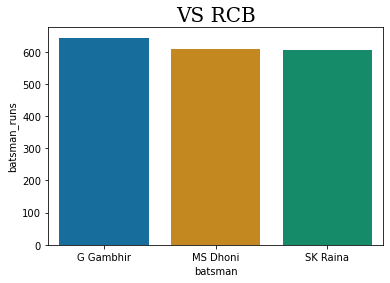

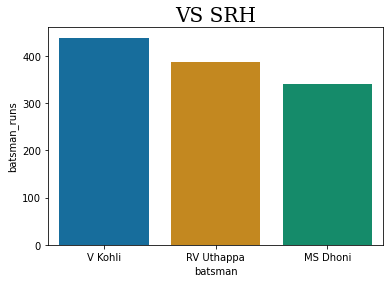

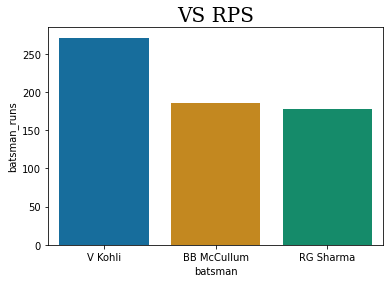

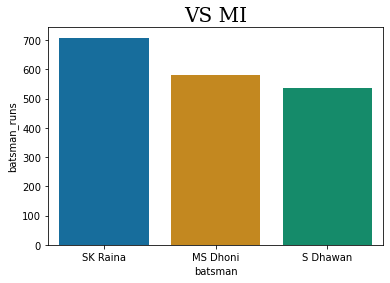

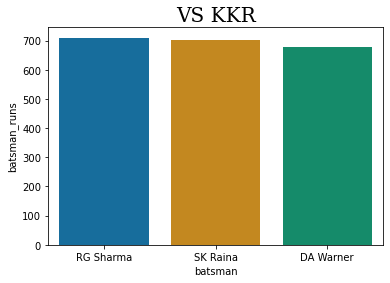

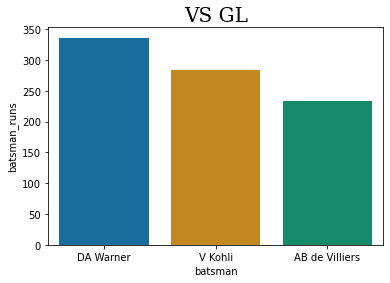

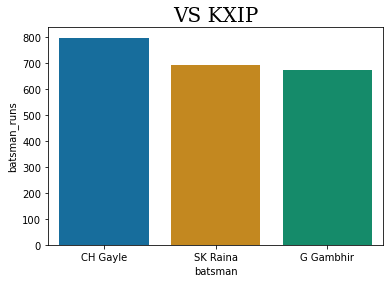

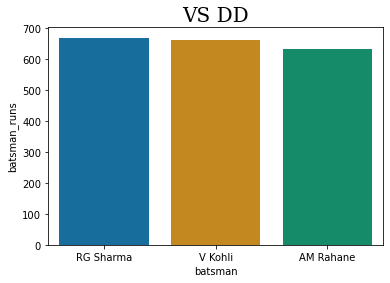

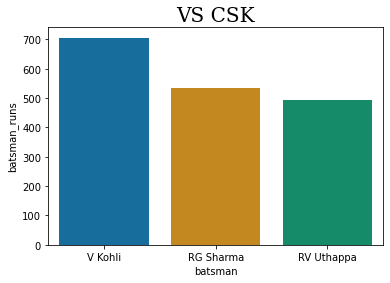

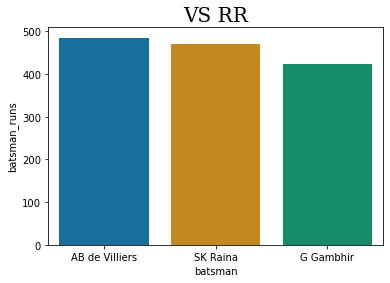

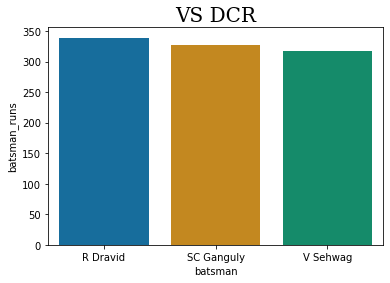

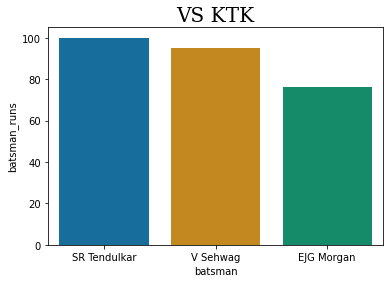

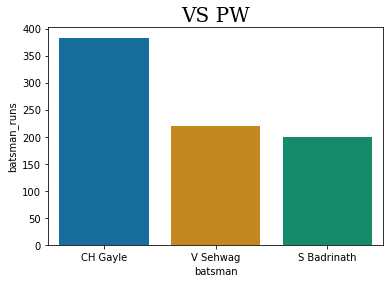

In [19]:
# lets define a function 
def against(a):
    sns.barplot(x='batsman',y='batsman_runs',palette='colorblind',
                data=top_agnst1[(top_agnst1['bowling_team']==a)])
#  using the for loop we can see the visualization:
for team in df_1.bowling_team.unique():
    fig,ax=plt.subplots()
    plt.title('VS '+team,fontdict={'family':'serif','color':'k','size':20})
    against(team)

## 6. Players among top 3 run scorer's against atleast 3 teams:

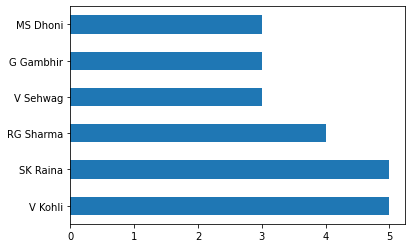

In [20]:
top_agnst1['batsman'].value_counts()[:6].plot(kind='barh');

### Observations:
1. Both V Kohli and SK Raina are among the top 3 run scorrers against 5 teams.
2. on the basis on batting position, getting MS Dhoni's name is very surprising.

## 7. Batsman performance agains particular bowlers:
We wil find who scores most against a particular bowler

In [21]:
# we want three features bowler batsman and batsman runs
# using group by and sum method we can find total run scored againse a particular bowler by any batter.
fav_bowler=df_1.groupby(['bowler','batsman'])['batsman_runs'].sum().reset_index()
# sorting the result got from above code
fav_bowler=fav_bowler.groupby('bowler').apply(lambda x: x.sort_values(by='batsman_runs',ascending=False)).reset_index(drop=True)
# lets keep only the top run scorer by using head(1)
fav_bowler1=fav_bowler.groupby('bowler').head(1).sort_values(by='batsman_runs',ascending=False).reset_index(drop=True)
# seeing the first 15 results
fav_bowler1[:15]

,bowler,batsman,batsman_runs
0,PP Chawla,SK Raina,152
1,A Mishra,V Kohli,149
2,UT Yadav,V Kohli,141
3,Harbhajan Singh,SK Raina,132
4,DJ Bravo,V Kohli,130
5,R Ashwin,V Kohli,127
6,P Kumar,DA Warner,124
7,M Morkel,RG Sharma,119
8,Z Khan,G Gambhir,109
9,SP Narine,DA Warner,108


## 8. Most boundaries: Batsman scoring 4's and 6's

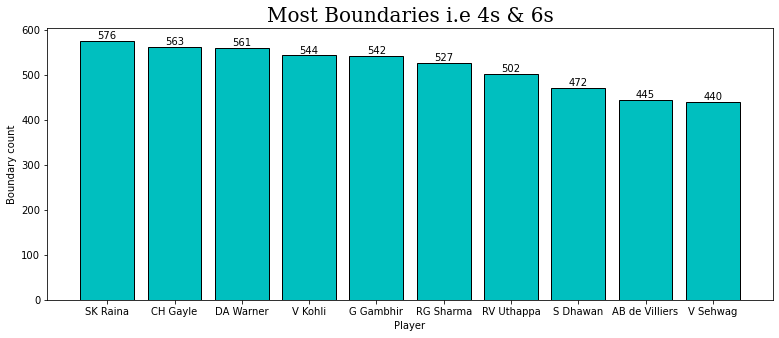

In [22]:
# lets locate the required instances using loc
most_4=df_1.loc[(df_1['batsman_runs']==4) | (df_1['batsman_runs']==6)]
# for better visualization lets store indexes and values in x,y respectively
x=most_4.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).index[:10]
y=most_4.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).values[:10]
# lets plot the figure
plt.figure(figsize=(13,5))
plt.bar(x,y,fc='c',ec='k')
plt.title('Most Boundaries i.e 4s & 6s',fontdict={'family':'serif','color':'k','size':20})
plt.xlabel('Player')
plt.ylabel('Boundary count')

# we write a for loop to add the number of boundaries on top of the bars
for i in range(len(y)):
    plt.text(i,y[i],str(y[i]),ha='center',va='bottom')   

## 9. Runs sored with boundaries

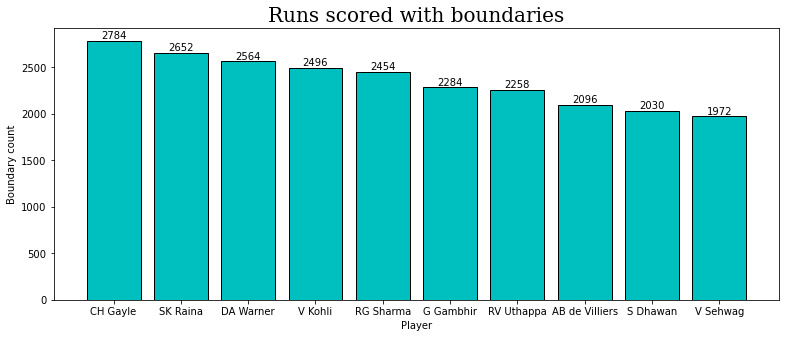

In [23]:
# using the same result and sum method we can find total runs score with boundaries
# storing the indexes and values
x=most_4.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).index[:10]
y=most_4.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).values[:10]
# ploting the figure
plt.figure(figsize=(13,5))
plt.bar(x,y,fc='c',ec='k')
plt.title('Runs scored with boundaries',fontdict={'family':'serif','color':'k','size':20})
plt.xlabel('Player')
plt.ylabel('Boundary count')

# we write a for loop to add the scores on top of the bars
for i in range(len(y)):
    plt.text(i,y[i],str(y[i]),ha='center',va='bottom')   

### Observation:
Gayle leads followed by Raina and Warner

## 10. Total runs and runs scored with boundaries: for highest run getters

In [24]:
# fetching the name of the top run scoreres
names=df_1.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)[:10].index
# fetching their total runs
total_runs=df_1.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)[:10].values
# fetching their run scored by boundary
boundary_runslis=most_4.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)
boundary_runs=[boundary_runslis[player] for player in names]

<Figure size 1080x1080 with 0 Axes>

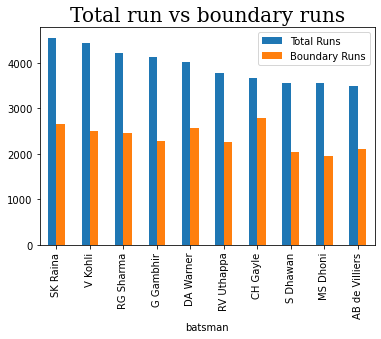

In [25]:
# ploting the barplot to comapre total runs vs runs scored with boundaries
plt.figure(figsize=(15,15))
perc=pd.DataFrame({'Total Runs':total_runs,'Boundary Runs':boundary_runs},index=names)
perc.plot( kind='bar', stacked=False)
plt.title('Total run vs boundary runs',fontdict={'family':'serif','color':'k','size':20});

## 11. Most trusted batsman for SUPER OVER

In [26]:
# let's see who have batted most number of times in super overs
df_1.loc[df_1['is_super_over']==1][['batsman','batsman_runs']].groupby('batsman').max().sort_values(by='batsman_runs',ascending=False)

,batsman_runs
batsman,
AB de Villiers,6
KA Pollard,6
YK Pathan,6
CH Gayle,6
CL White,6
DPMD Jayawardene,6
SK Raina,6
IK Pathan,6
MK Pandey,6


# Bowler Analysis

## 1. Highest Wicket taker

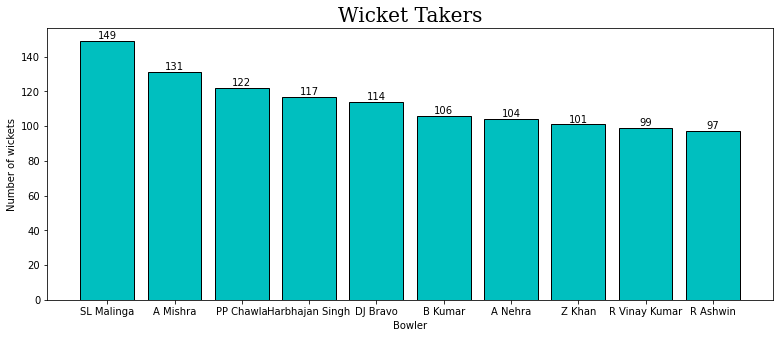

In [27]:
# we have to separte dismissals which are caused by bowler, not by fielder or unfairmeans i.e obstructing the field

wick_bowler=df_1.loc[(df_1['dismissal_kind']=='caught') | (df_1['dismissal_kind']=='bowled') | (df_1['dismissal_kind']=='lbw') |
         (df_1['dismissal_kind']=='stumped') | (df_1['dismissal_kind']=='hit wicket')]['bowler'].value_counts(ascending=False)[:10]

# storing indexes and values

x=wick_bowler.index
y=wick_bowler.values

# plotting the figure

plt.figure(figsize=(13,5))
plt.bar(x,y,fc='c',ec='k')
plt.title('Wicket Takers',fontdict={'family':'serif','color':'k','size':20})
plt.xlabel('Bowler')
plt.ylabel('Number of wickets')

# we write a for loop to add the wickets on top of the bars
for i in range(len(y)):
    plt.text(i,y[i],str(y[i]),ha='center',va='bottom')   

### Observer: 
1. Slinga Malinga is the highest wicket taker.
2. Mishra Chawla Bravo are some otheramong top 10 bowlers

## 2. Death overs specialist: 20th over

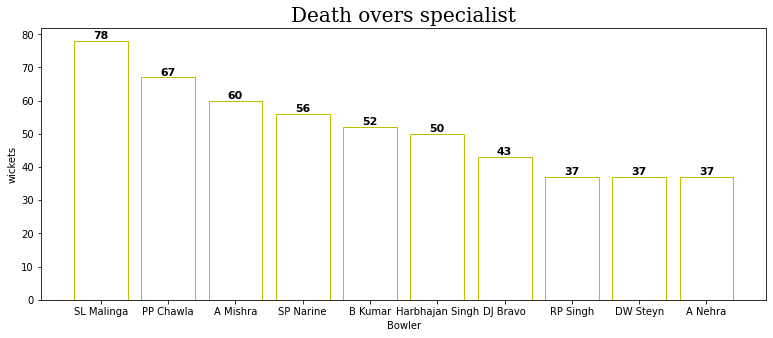

In [28]:
# finding the top wicket takers in 20th over
death_over = df_1.loc[(df_1['over']==20) & (df_1['dismissal_kind']=='caught') | (df_1['dismissal_kind']=='bowled') | (df_1['dismissal_kind']=='lbw') |
         (df_1['dismissal_kind']=='stumped') | 
         (df_1['dismissal_kind']=='hit wicket') ].groupby('bowler')[['bowler']].value_counts().sort_values(ascending=False)[:10]
# storing indexes and wickets
x=death_over.index
y=death_over.values
# plotting the figure
plt.figure(figsize=(13,5))
plt.bar(x,y,fc='w',ec='y')
plt.title('Death overs specialist',fontdict={'family':'serif','color':'k','size':20})
plt.xlabel('Bowler')
plt.ylabel('wickets')

# we write a for loop to add the wickets on top of the bars
for i in range(len(y)):
    plt.text(i,y[i],str(y[i]),ha='center',va='bottom',fontdict={'weight':'bold','size':11})   

### Observations:
1. SL malinga is the highest wicket taker in last  overs.
2. if we compare last  overs wicket to the total wickets taken by the bowler we can see that more than 50% of toal wickets SL malinga has taken in last overs.

## 3. Favourite batsman: top 3 favorite batsman of the most wicket takers

In [38]:
# from below code we will get the required data 
fav_bat=df_1.loc[(df_1['dismissal_kind']=='caught') | (df_1['dismissal_kind']=='bowled') | (df_1['dismissal_kind']=='lbw') |
         (df_1['dismissal_kind']=='stumped') | 
         (df_1['dismissal_kind']=='hit wicket')].groupby('bowler')
# find number of dismissal and reseting the index to make new DataFrame
fav_bats=fav_bat[['bowler','batsman']].value_counts().reset_index().rename(columns={0:'number of times'})

# sorting the values
fav_batsm=fav_bats.groupby('bowler').apply(lambda x: x.sort_values(by='number of times',ascending=False)).reset_index(drop=True)

# keeping only the top three records
fav_batsman=fav_batsm.groupby('bowler').head(3).reset_index(drop=True)

# lets view the result 
fav_batsman.head()

,bowler,batsman,number of times
0,A Ashish Reddy,RV Uthappa,3
1,A Ashish Reddy,DJG Sammy,1
2,A Ashish Reddy,Yuvraj Singh,1
3,A Chandila,SC Ganguly,1
4,A Chandila,PA Reddy,1


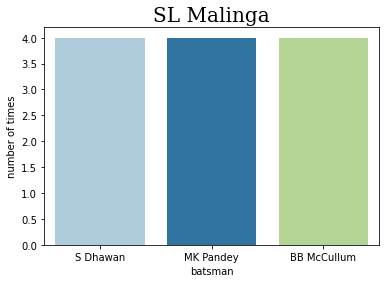

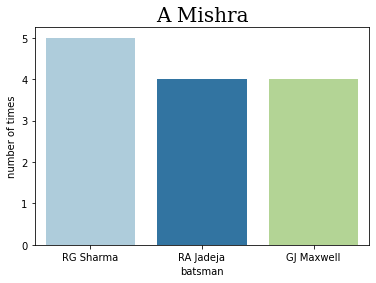

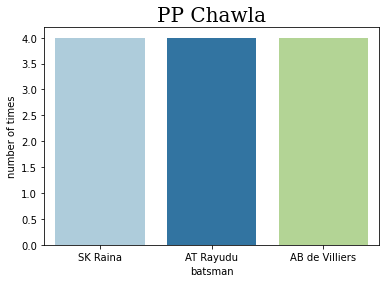

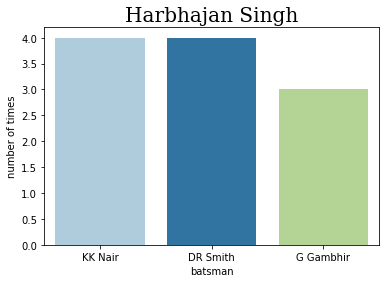

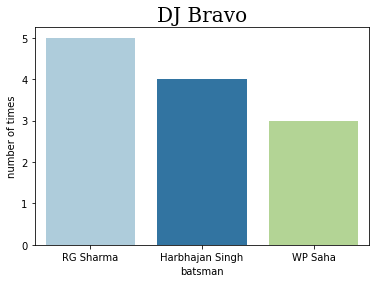

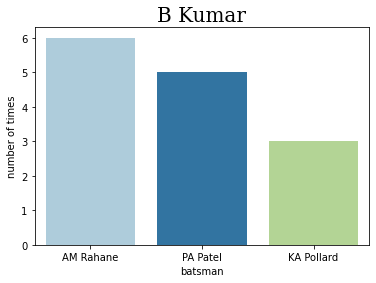

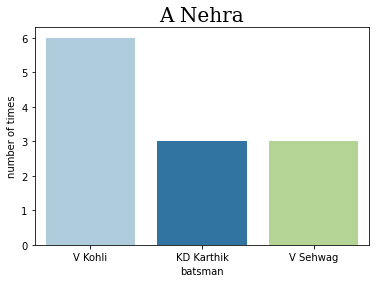

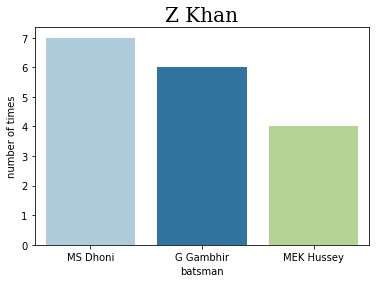

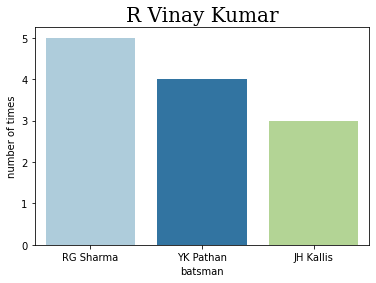

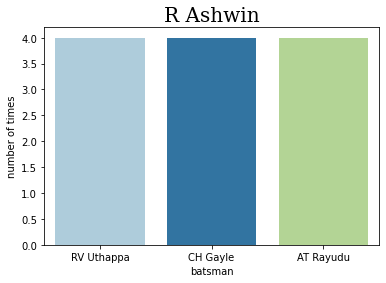

In [39]:
# lets define a function 
def favbatsman(a):
    sns.barplot(x='batsman',y='number of times',palette='Paired',
                data=fav_batsman[(fav_batsman['bowler']==a)])
#  using the for loop we can see the visualization:
for bowler in wick_bowler.index:
    fig,ax=plt.subplots()
    plt.title(bowler,fontdict={'family':'serif','color':'k','size':20})
    favbatsman(bowler)

## 4. Favourite Team : bowlers taking maximum wickets against a particular team

In [40]:
# below code will give us the required instances
fav_team=df_1.loc[(df_1['dismissal_kind']=='caught') | (df_1['dismissal_kind']=='bowled') | (df_1['dismissal_kind']=='lbw') |
         (df_1['dismissal_kind']=='stumped') | 
         (df_1['dismissal_kind']=='hit wicket')][['bowler','batting_team']].groupby('bowler')
# finding number of wickets
fav_t=fav_team[['bowler','batting_team']].value_counts().reset_index().rename(columns={0:'number of wickets'})
# sorting 
fav_T=fav_t.groupby('bowler').apply(lambda x: x.sort_values(by='number of wickets',ascending=False)).reset_index(drop=True)
# keeping only 3 records for a particular bowler
fav_TEAM=fav_T.groupby('bowler').head(3).reset_index(drop=True)
# lets see the results
fav_TEAM.head()

,bowler,batting_team,number of wickets
0,A Ashish Reddy,RCB,5
1,A Ashish Reddy,PW,4
2,A Ashish Reddy,KKR,2
3,A Chandila,PW,3
4,A Chandila,SRH,2


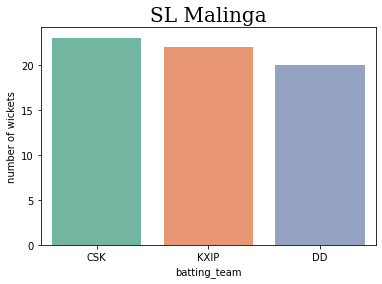

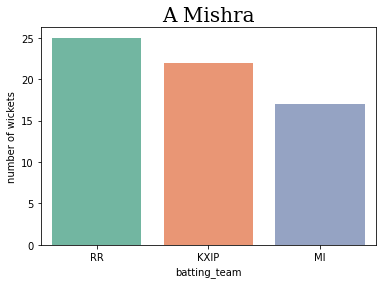

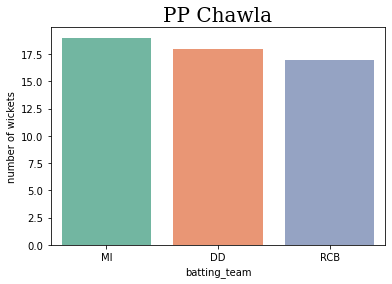

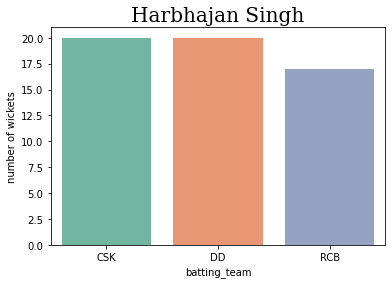

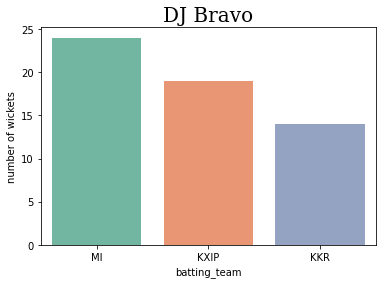

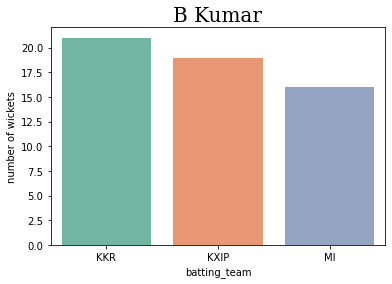

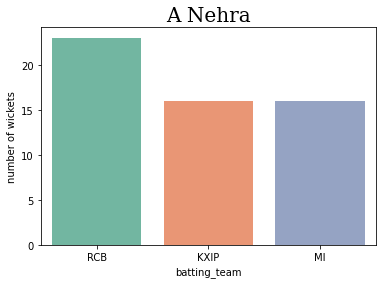

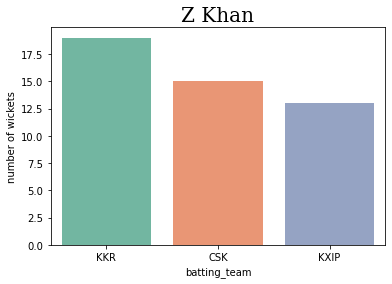

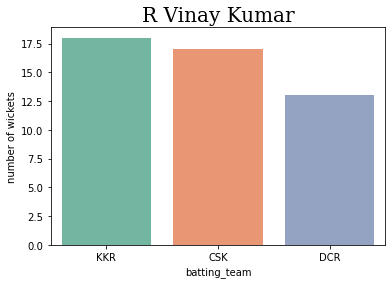

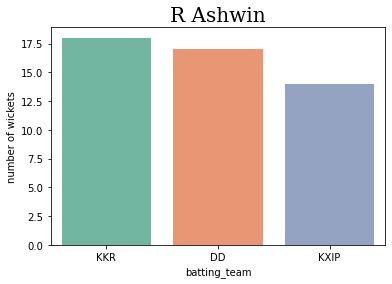

In [41]:
# lets define a function 
def favteam(a):
    sns.barplot(x='batting_team',y='number of wickets',palette='Set2',
                data=fav_TEAM[(fav_TEAM['bowler']==a)])
#  using the for loop we can see the visualization:
for bowler in wick_bowler.index:
    fig,ax=plt.subplots()
    plt.title(bowler,fontdict={'family':'serif','color':'k','size':20})
    favteam(bowler)

## 5. Most dot balls bowled:

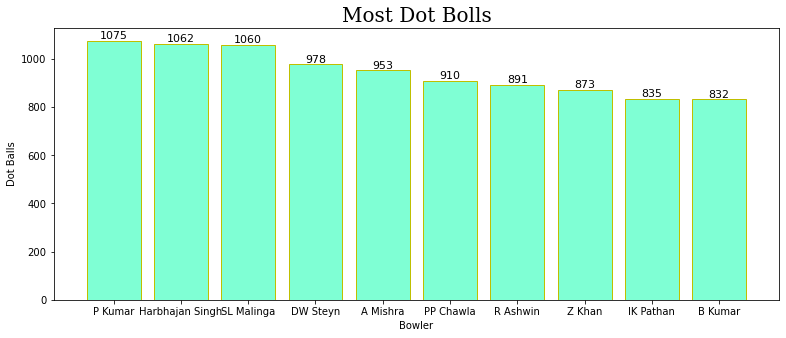

In [33]:
# dot balls are those on which no run is scored
x=df_1.loc[(df_1['total_runs']==0)]['bowler'].value_counts().index[:10]
y=df_1.loc[(df_1['total_runs']==0)]['bowler'].value_counts().values[:10]

# lets plot the figure
plt.figure(figsize=(13,5))
plt.bar(x,y,fc='aquamarine',ec='y')
plt.title('Most Dot Bolls',fontdict={'family':'serif','color':'k','size':20})
plt.xlabel('Bowler')
plt.ylabel('Dot Balls')

# we write a for loop to add the dot balls on top of the bars
for i in range(len(y)):
    plt.text(i,y[i],str(y[i]),ha='center',va='bottom',fontdict={'size':11})   


### Observations:
1. P kumar, Harbhajan Singh and Maling has bowled most number of dot balls.

## 6. Dismissal kind

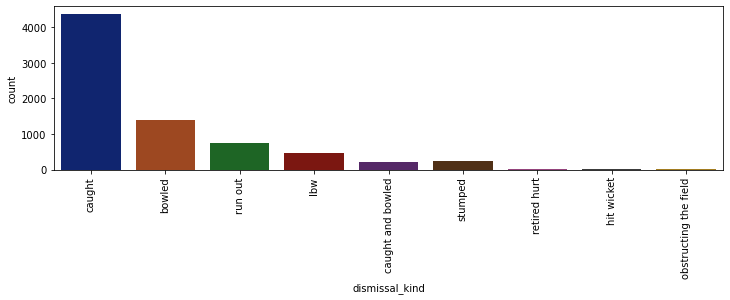

In [34]:
# finding the most frequent kind of dismissal
plt.figure(figsize=(12,3))
sns.countplot(x='dismissal_kind', data=df_1,palette='dark')
plt.xticks(rotation='vertical')
plt.show()

### Observations:
Catch out is the most frequent king of dismissal.

# Fielder Analysis:

## 1. Fielder involve in most number of runouts:

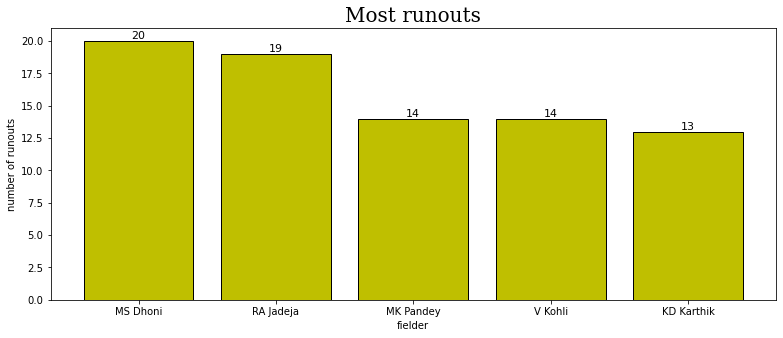

In [35]:
# locating and storinng
x=df_1.loc[(df_1['dismissal_kind']=='run out')]['fielder'].value_counts().sort_values(ascending=False)[:5].index
y=df_1.loc[(df_1['dismissal_kind']=='run out')]['fielder'].value_counts().sort_values(ascending=False)[:5].values
# plotting the figure
plt.figure(figsize=(13,5))
plt.bar(x,y,fc='y',ec='k')
plt.title('Most runouts',fontdict={'family':'serif','color':'k','size':20})
plt.xlabel('fielder')
plt.ylabel('number of runouts')

# we write a for loop to add the number of runouts on top of the bars
for i in range(len(y)):
    plt.text(i,y[i],str(y[i]),ha='center',va='bottom',fontdict={'size':11})   


### Observations:
1. If we remove the wicketkeepers from the result we will see that  sir Jadeja is the most accurate fielder.

## 2. Safest pair of hands: most number of catches

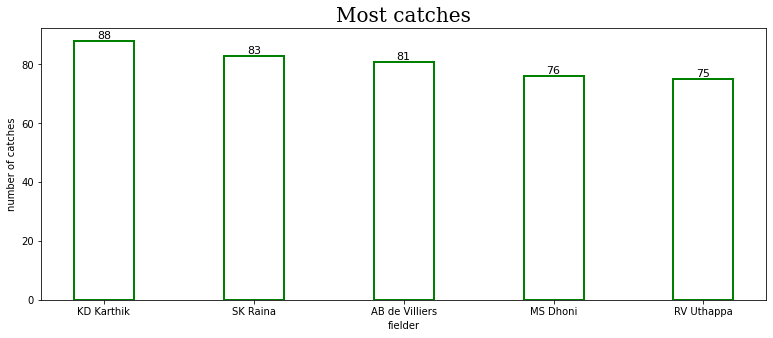

In [37]:
# we are not including caught and bowled as they will be very less 
x=df_1.loc[(df_1['dismissal_kind']=='caught')]['fielder'].value_counts().sort_values(ascending=False)[:5].index
y=df_1.loc[(df_1['dismissal_kind']=='caught')]['fielder'].value_counts().sort_values(ascending=False)[:5].values

# plotting the bar plot
plt.figure(figsize=(13,5))
plt.bar(x,y,fc='w',ec='g',linewidth=2,width=0.4)
plt.title('Most catches',fontdict={'family':'serif','color':'k','size':20})
plt.xlabel('fielder')
plt.ylabel('number of catches')

# we write a for loop to add the catches count on top of the bars
for i in range(len(y)):
    plt.text(i,y[i],str(y[i]),ha='center',va='bottom',fontdict={'size':11})   


### Observation:
1. Karthik and MSD are keeper's hence there name is no surprise.
2. from others we can say Raina, ABD and Uthappa has the safest pair of hands.